In [1]:
import os
import math
from typing import *

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_model_optimization as tfmot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow import keras 
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from tensorflow_model_optimization.sparsity.keras import ConstantSparsity

In [2]:
neuroresults_random1=pd.read_csv('neuroresults_random1',sep="\t")
neuroresults_random2=pd.read_csv('neuroresults_random2',sep="\t")
neuroresults_random3=pd.read_csv('neuroresults_random3',sep="\t")
print(neuroresults_random1.shape)
print(neuroresults_random2.shape)
print(neuroresults_random3.shape)

(1043387, 42)
(1037730, 42)
(1037556, 42)


In [3]:
#searching for nan values
print(neuroresults_random1.isnull().any().any())
print(neuroresults_random2.isnull().any().any())
print(neuroresults_random3.isnull().any().any())

False
False
False


In [4]:
neuroresults_random1.head(20)

,Experiment,Run,Subrun,Event,Track,nTracks,Expert,iNodes,oNodes,SL0-relID,...,SL7-alpha,SL8-relID,SL8-driftT,SL8-alpha,RecoZ,RecoTheta,ScaleZ,RawZ,ScaleTheta,RawTheta
0,20,738,0,13824,0,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
1,20,738,0,13824,1,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
2,20,738,0,13824,2,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.529239,2168,0.271151,1111
3,20,738,0,13824,3,5,0,27,2,0.000000,...,-0.159696,0.000000,0.000000,0.000000,0.555959,0.337421,0.267489,1096,-0.015505,-63
4,20,738,0,13824,4,5,0,27,2,0.000000,...,-0.159696,0.783737,0.000000,-0.178484,0.555959,0.337421,0.437675,1793,0.169821,696
5,20,738,0,36864,0,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.476010,1950,0.289952,1188
6,20,738,0,36864,1,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.538518,2206,0.370773,1519
7,20,738,0,36864,2,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.529239,2168,0.346112,1418
8,20,738,0,36864,3,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.426932,1749,0.287755,1179
9,20,738,0,36864,4,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.594677,2436,0.380784,1560


In [5]:
#expert 0
data = pd.concat([neuroresults_random1,neuroresults_random2,neuroresults_random3 ])
data_expert0 = data[data['Expert'] == 0]
from scipy import stats
print(data_expert0.shape)

data_expert0 = data_expert0[(np.abs(stats.zscore(data_expert0['RecoZ']))<3)]                                                                                                                                             

    
print(data_expert0.shape)

(2429627, 42)
(2422745, 42)


In [6]:
2429627

2429627

In [7]:
from sklearn.utils import shuffle

inpval=['SL0-relID','SL0-driftT','SL0-alpha','SL1-relID','SL1-driftT','SL1-alpha','SL2-relID','SL2-driftT',
        'SL2-alpha','SL3-relID','SL3-driftT','SL3-alpha','SL4-relID','SL4-driftT','SL4-alpha','SL5-relID',
        'SL5-driftT','SL5-alpha','SL6-relID','SL6-driftT','SL6-alpha','SL7-relID','SL7-driftT','SL7-alpha',
        'SL8-relID','SL8-driftT','SL8-alpha']
outpval=['RecoZ','RecoTheta']
data_expert0_X, data_expert0_Y = shuffle(data_expert0[inpval], data_expert0[outpval])

<AxesSubplot:>

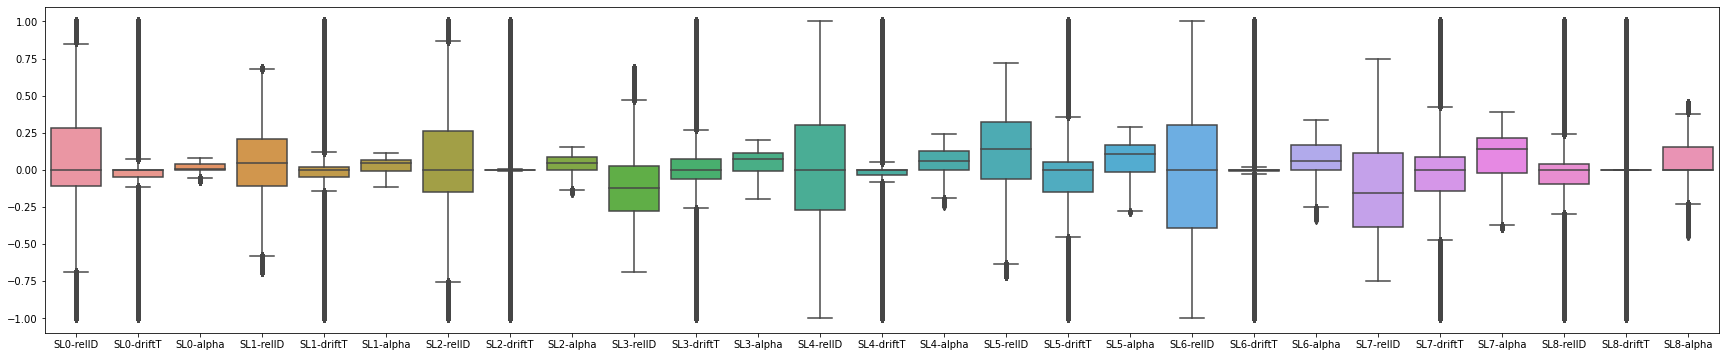

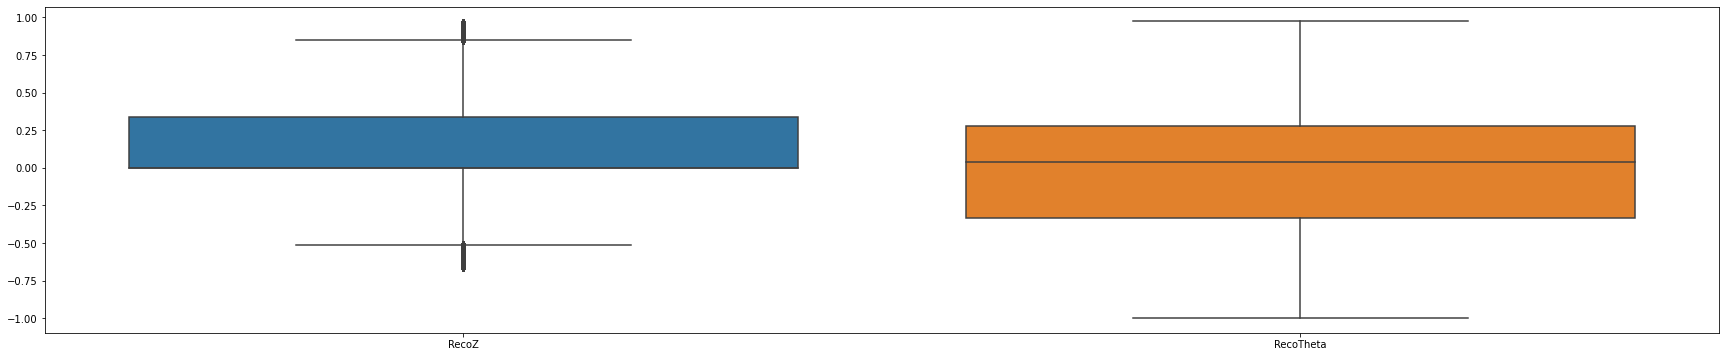

In [8]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (30, 6)
fig, ax1 = pyplot.subplots(figsize=plot_dims)
fig, ax2 = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=data_expert0_X, ax=ax1)
sns.boxplot(data=data_expert0_Y, ax=ax2)

We can see that the Data is already prepared. So lets look more into it

Text(0.5, 1.0, 'Correlation Heatmap')

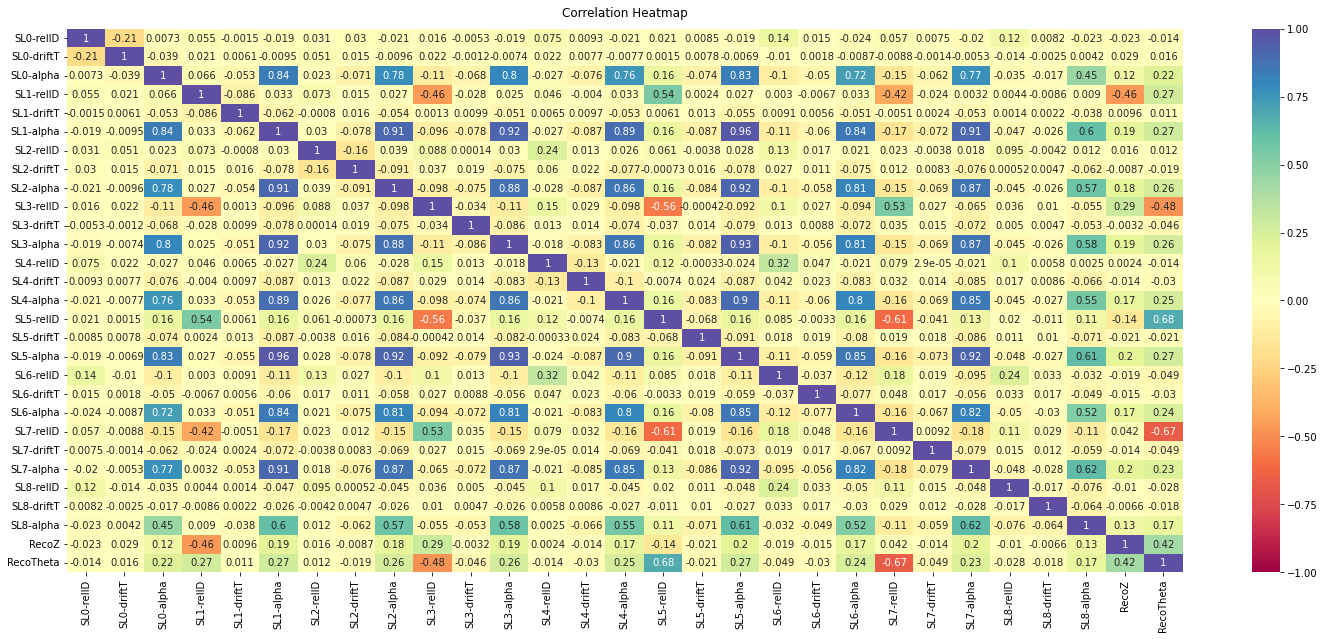

In [9]:
plt.figure(figsize=(25, 10))
variables = inpval+outpval
data_h = data[variables]
heatmap = sns.heatmap(data_h.corr(), vmin=-1, vmax=1, annot=True,cmap="Spectral")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<function matplotlib.pyplot.show(close=None, block=None)>

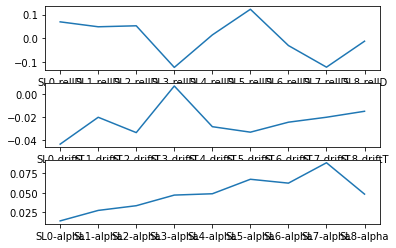

<Figure size 432x288 with 0 Axes>

In [10]:
rellDs=['SL0-relID','SL1-relID','SL2-relID','SL3-relID','SL4-relID','SL5-relID',
        'SL6-relID','SL7-relID','SL8-relID']
rellDsvals=data_expert0[rellDs]
meanrellDsvals=rellDsvals.mean()
driftTs=['SL0-driftT','SL1-driftT','SL2-driftT','SL3-driftT','SL4-driftT','SL5-driftT',
         'SL6-driftT','SL7-driftT','SL8-driftT']
driftTsvals=data_expert0[driftTs]
meandriftTsvals=driftTsvals.mean()
alphas=['SL0-alpha','SL1-alpha','SL2-alpha','SL3-alpha','SL4-alpha','SL5-alpha','SL6-alpha',
        'SL7-alpha','SL8-alpha']
alphasvals=data_expert0[alphas]
meanalphasvals=alphasvals.mean()
figure, axis = plt.subplots(3, 1)
f = plt.figure()
axis[0].plot(meanrellDsvals)
axis[1].plot(meandriftTsvals)
axis[2].plot(meanalphasvals)
plt.show

(array([1.8000e+01, 1.8000e+01, 1.6000e+01, 1.1000e+01, 1.9000e+01,
        2.1000e+01, 1.7000e+01, 2.5000e+01, 2.6000e+01, 2.7000e+01,
        2.7000e+01, 2.5000e+01, 3.0000e+01, 4.0000e+01, 4.2000e+01,
        2.8000e+01, 2.9000e+01, 2.3000e+01, 3.1000e+01, 2.3000e+01,
        2.3000e+01, 3.3000e+01, 1.6000e+01, 1.9000e+01, 3.0000e+01,
        2.4000e+01, 2.5000e+01, 3.4000e+01, 2.8000e+01, 3.3000e+01,
        2.9000e+01, 2.2000e+01, 2.4000e+01, 3.3000e+01, 3.9000e+01,
        3.6000e+01, 3.2000e+01, 3.0000e+01, 3.8000e+01, 4.5000e+01,
        5.1000e+01, 4.4000e+01, 4.1000e+01, 6.5000e+01, 6.4000e+01,
        4.9000e+01, 7.1000e+01, 7.4000e+01, 7.9000e+01, 1.0000e+02,
        1.0200e+02, 1.1000e+02, 1.1000e+02, 1.0800e+02, 1.4300e+02,
        1.5600e+02, 1.4000e+02, 1.3200e+02, 1.3000e+02, 1.2600e+02,
        1.6000e+02, 1.5300e+02, 1.8000e+02, 2.0500e+02, 2.1100e+02,
        1.7700e+02, 2.2200e+02, 3.8300e+02, 9.0100e+02, 2.2520e+03,
        1.9210e+03, 1.0350e+03, 8.0900e+02, 7.98

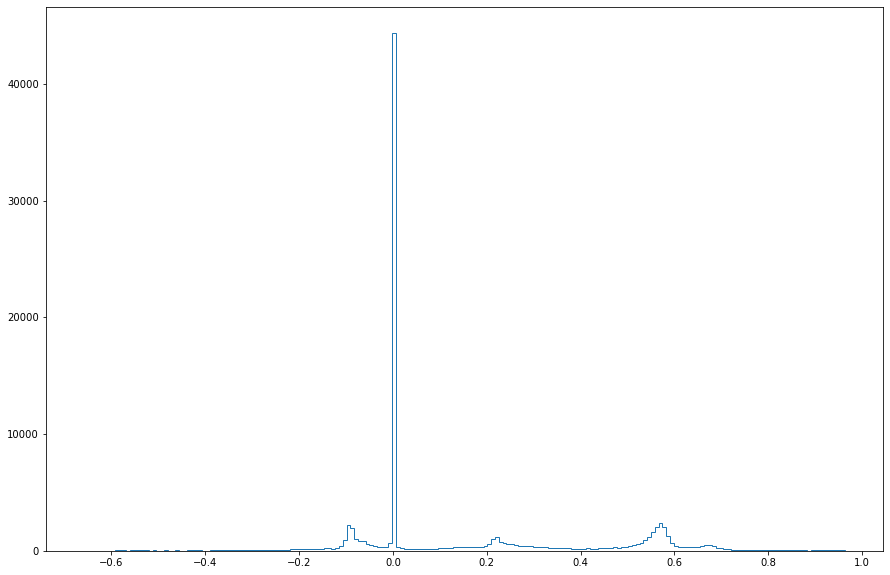

In [11]:
data_expert0_X_short = data_expert0_X.iloc[0:100000]
data_expert0_Y_short = data_expert0_Y.iloc[0:100000]
plot_dims = (15, 10)
plt.figure(figsize=plot_dims)
plt.hist(data_expert0_Y_short['RecoZ'], bins=200,histtype='step')

Benchmark and plot function

mse_Z
0.03711223588225651
mse_Theta
0.0427288748700711
sigma_Z
0.1894231548137373
sigma_Theta
0.20165440330742762


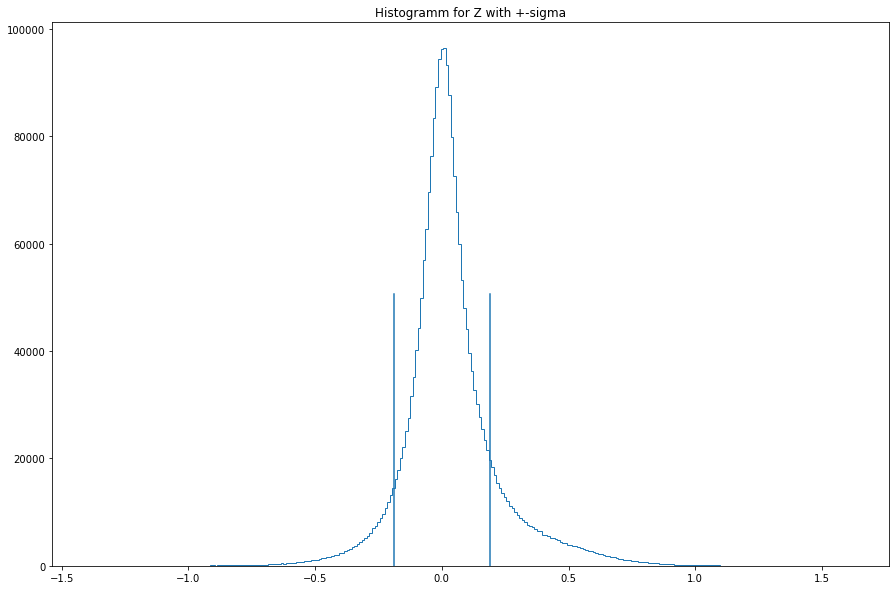

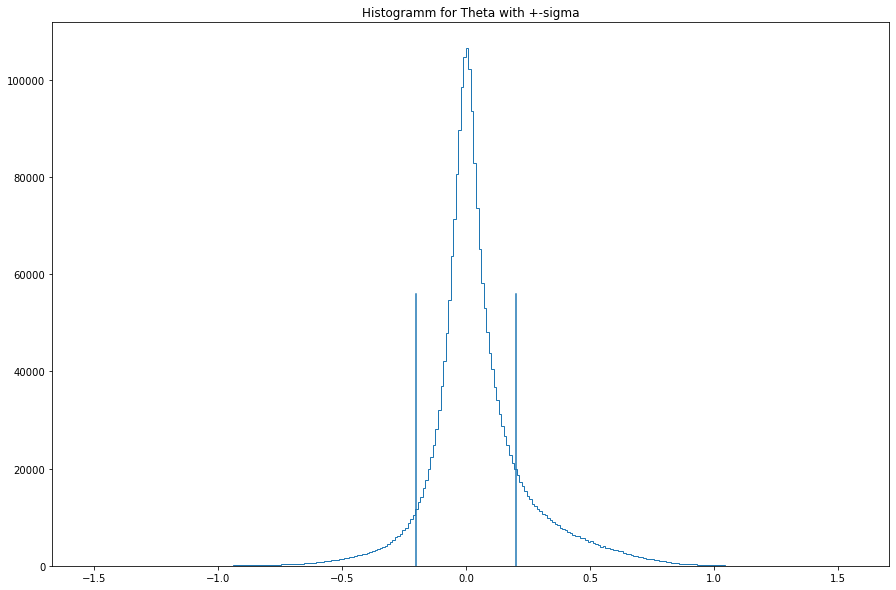

In [12]:
def plot_as_hist(df_pred_Z: pd.DataFrame, df_pred_Theta:pd.DataFrame,df_real_Z: pd.DataFrame, df_real_Theta: pd.DataFrame):
    
    mseZ=mean_squared_error(df_real_Z, df_pred_Z)
    mseTheta=mean_squared_error(df_real_Theta, df_pred_Theta)
    print('mse_Z')
    print(mseZ)
    print('mse_Theta')
    print(mseTheta)

    error_Z=df_real_Z-df_pred_Z
    error_Theta=df_real_Theta-df_pred_Theta

    sigma_Z=error_Z.std()
    sigma_Theta=error_Theta.std()
    print('sigma_Z')
    print(sigma_Z)
    print('sigma_Theta')
    print(sigma_Theta)
    plot_dims = (15, 10)
    plt.figure(figsize=plot_dims)
    
    plt.axvline(x=-sigma_Z,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Z,ymin=0, ymax=0.5)
    plt.hist(error_Z, bins=300,histtype='step')
    plt.savefig('sigma_Z.png')
    plt.title('Histogramm for Z with +-sigma')
    plt.show()
    
    plt.figure(figsize=plot_dims)
    plt.axvline(x=-sigma_Theta,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Theta,ymin=0, ymax=0.5)
    plt.hist(error_Theta, bins=300,histtype='step')
    plt.savefig('sigma_Theta.png')
    plt.title('Histogramm for Theta with +-sigma')

    

plot_as_hist(data_expert0['ScaleZ'],data_expert0['ScaleTheta'],data_expert0['RecoZ'],data_expert0['RecoTheta'])

# Start with Modelling

Searching for the best parameters

In [13]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [14]:
batch_size = [16,32,64,128]
optimizer = ['SGD', 'RMSprop', 'Adam']

parameters = dict(batch_size=batch_size,optimizer=optimizer)

def create_model(optimizer = 'adam'): 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81,input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    # compile the keras model
    model.summary()
    model.compile(loss='mse', metrics=['mse'])
    return model 

model = KerasRegressor(model=create_model)
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=3,verbose=0)
grid_result = grid.fit(data_expert0_X_short,data_expert0_Y_short,epochs=30, validation_split = 0.15 )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                2268      
                                                                 
 dense_1 (Dense)             (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3542/3542 [==============================] - 12s 3ms/step - loss: 0.0671 - mse: 0.0671 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 2/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 3/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 4/30
3542/3542 [=======================

Epoch 21/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 22/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 23/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 24/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 25/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 26/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 27/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 28/30
3542/3542 [=========================

3542/3542 [==============================] - 11s 3ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 11/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 12/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 13/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 14/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 15/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 16/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0585 - mse: 0.0585 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 17/30
3542/3542 [==============================] - 11s

Epoch 1/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0792 - mse: 0.0792 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 2/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 3/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 4/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 5/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 6/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 7/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 8/30
3542/3542 [==============================] -

Epoch 26/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 27/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 28/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 29/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 30/30
2084/2084 [==============================] - 2s 794us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 81)                2268      
                                                                 
 dense_15 (Dense)            (None, 2)                 164       
                                 

3542/3542 [==============================] - 11s 3ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 16/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 17/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 18/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 19/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 20/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 21/30
3542/3542 [==============================] - 11s 3ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.0598 - val_mse: 0.0598
Epoch 22/30
3542/3542 [==============================] - 11s

Epoch 5/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 6/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 7/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0613 - val_mse: 0.0613
Epoch 8/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 9/30
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 10/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 11/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 12/30
1771/1771 [==============================] - 5s 

1042/1042 [==============================] - 1s 806us/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 81)                2268      
                                                                 
 dense_25 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1771/1771 [==============================] - 6s 3ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0647 - val_mse: 0.0647
Epoch 2/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0636 - mse: 0.0636 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 3/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0622 - mse: 0.0622 - val_loss: 0.0628 - va

Epoch 20/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 21/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 22/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0583 - mse: 0.0583 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 23/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 24/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0582 - mse: 0.0582 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 25/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 26/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 27/30
1771/1771 [==============================] 

Epoch 10/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 11/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 12/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 13/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 14/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 15/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 16/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0599 - val_mse: 0.0599
Epoch 17/30
1771/1771 [==============================] 

1771/1771 [==============================] - 6s 3ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 2/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0631 - mse: 0.0631 - val_loss: 0.0630 - val_mse: 0.0630
Epoch 3/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0621 - val_mse: 0.0621
Epoch 4/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 5/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 6/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 7/30
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 8/30
1771/1771 [==============================] - 5s 3ms/step - los

Epoch 27/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 28/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 29/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0590 - val_mse: 0.0590
Epoch 30/30
521/521 [==============================] - 0s 800us/step
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 81)                2268      
                                                                 
 dense_39 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_____________________________________________

886/886 [==============================] - 3s 3ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 18/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 19/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 20/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 21/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 22/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 23/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 24/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0588

886/886 [==============================] - 3s 3ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 8/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 9/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0606 - mse: 0.0606 - val_loss: 0.0611 - val_mse: 0.0611
Epoch 10/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 11/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 12/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 13/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0608 - val_mse: 0.0608
Epoch 14/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0599 -

Epoch 1/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0688 - mse: 0.0688 - val_loss: 0.0656 - val_mse: 0.0656
Epoch 2/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 3/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0627 - mse: 0.0627 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 4/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0620 - val_mse: 0.0620
Epoch 5/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0614 - mse: 0.0614 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 6/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0611 - mse: 0.0611 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 7/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0617 - val_mse: 0.0617
Epoch 8/30
886/886 [==============================] - 3s 3ms/step - loss: 0.

886/886 [==============================] - 3s 3ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0588 - val_mse: 0.0588
Epoch 28/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0589 - val_mse: 0.0589
Epoch 29/30
886/886 [==============================] - 3s 3ms/step - loss: 0.0578 - mse: 0.0578 - val_loss: 0.0588 - val_mse: 0.0588
Epoch 30/30
521/521 [==============================] - 0s 832us/step
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 81)                2268      
                                                                 
 dense_53 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________

443/443 [==============================] - 1s 3ms/step - loss: 0.0598 - mse: 0.0598 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 18/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 19/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 20/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 21/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 22/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 23/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 24/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0586

443/443 [==============================] - 1s 3ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 8/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 9/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0604 - mse: 0.0604 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 10/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0615 - val_mse: 0.0615
Epoch 11/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 12/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 13/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 14/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0599 -

Epoch 1/30
443/443 [==============================] - 2s 3ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 2/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0646 - mse: 0.0646 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 3/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0632 - mse: 0.0632 - val_loss: 0.0631 - val_mse: 0.0631
Epoch 4/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0626 - val_mse: 0.0626
Epoch 5/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 6/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 7/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0613 - mse: 0.0613 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 8/30
443/443 [==============================] - 1s 3ms/step - loss: 0.

443/443 [==============================] - 1s 3ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 28/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 29/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 30/30
261/261 [==============================] - 0s 824us/step
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 81)                2268      
                                                                 
 dense_67 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________

443/443 [==============================] - 1s 3ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 18/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 19/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 20/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 21/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 22/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0598 - val_mse: 0.0598
Epoch 23/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 24/30
443/443 [==============================] - 1s 3ms/step - loss: 0.0587

2657/2657 [==============================] - 8s 3ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0616 - val_mse: 0.0616
Epoch 8/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 9/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 10/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 11/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0593 - mse: 0.0593 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 12/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 13/30
2657/2657 [==============================] - 8s 3ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 14/30
2657/2657 [==============================] - 8s 3ms/step 

In [15]:
print(grid_result.best_params_)

{'batch_size': 32, 'optimizer': 'SGD'}


Training mit den besten params 

In [16]:
from sklearn.model_selection import train_test_split
data_expert0_X_train, data_expert0_X_test, data_expert0_Y_train, data_expert0_Y_test = train_test_split(data_expert0_X, data_expert0_Y, test_size=0.2)

In [17]:
def create_model1():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81, input_dim=27,activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model

model1=create_model1()
model1.summary()
model1.compile(optimizer ='adam',loss='mse', metrics='mse')
model1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30, batch_size=64, validation_split=0.15) 


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 81)                2268      
                                                                 
 dense_75 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25742/25742 [==============================] - 64s 2ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0578 - val_mse: 0.0578
Epoch 2/30
25742/25742 [==============================] - 64s 2ms/step - loss: 0.0574 - mse: 0.0574 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 3/30
25742/25742 [==============================] - 64s 2ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 4/30
25742/25742 [============

mse_Z
0.020420482676015234
mse_Theta
0.092133275416779
sigma_Z
0.14253884768425648
sigma_Theta
0.2592858605175613


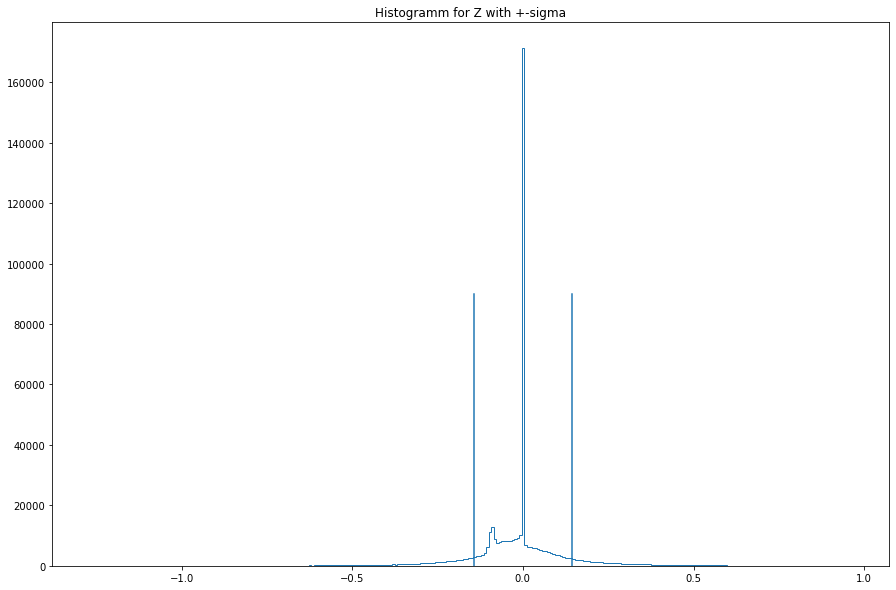

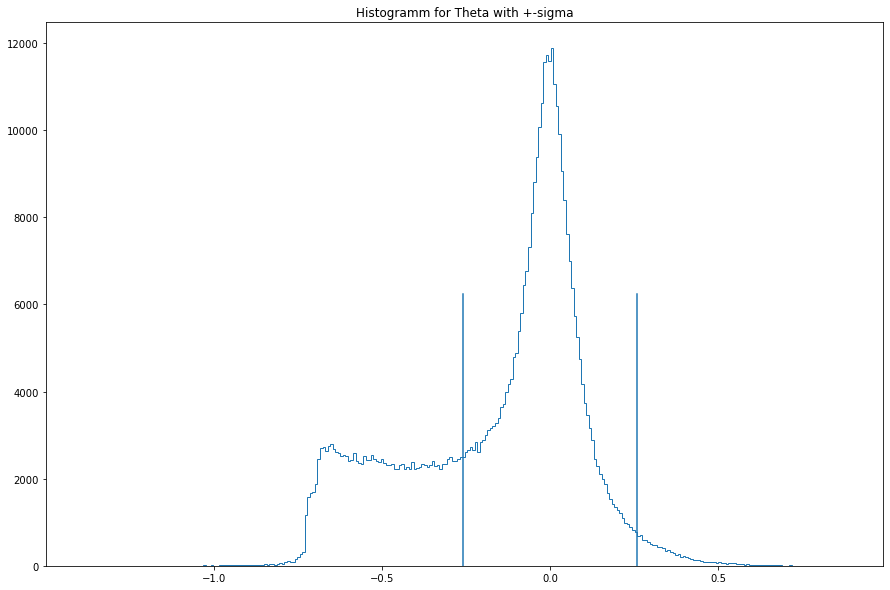

In [18]:
Y_predicted_1 = model1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_1[:,0],Y_predicted_1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

Mit anpassbare learningrate

In [19]:
def scheduler (epoch,lr) : 
    if epoch < 10 :
        return lr
    else : 
        return lr*tf.math.exp(-0.1)
    
scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [20]:
def create_model2():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81, input_dim=27,activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model

model2=create_model2()
model2.summary()
model2.compile(optimizer ='adam',loss='mse', metrics='mse')
model2.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30, batch_size=64, validation_split=0.15, callbacks=scheduler)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 81)                2268      
                                                                 
 dense_77 (Dense)            (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25742/25742 [==============================] - 64s 2ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0578 - val_mse: 0.0578 - lr: 0.0010
Epoch 2/30
25742/25742 [==============================] - 65s 3ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0572 - val_mse: 0.0572 - lr: 0.0010
Epoch 3/30
25742/25742 [==============================] - 63s 2ms/step - loss: 0.0571 - mse: 0.0571 - val_loss: 0.0570 - val_mse: 0.0570 - lr: 0.00

mse_Z
0.019994594995603632
mse_Theta
0.0917618592309475
sigma_Z
0.14088873849619937
sigma_Theta
0.2616972002519202


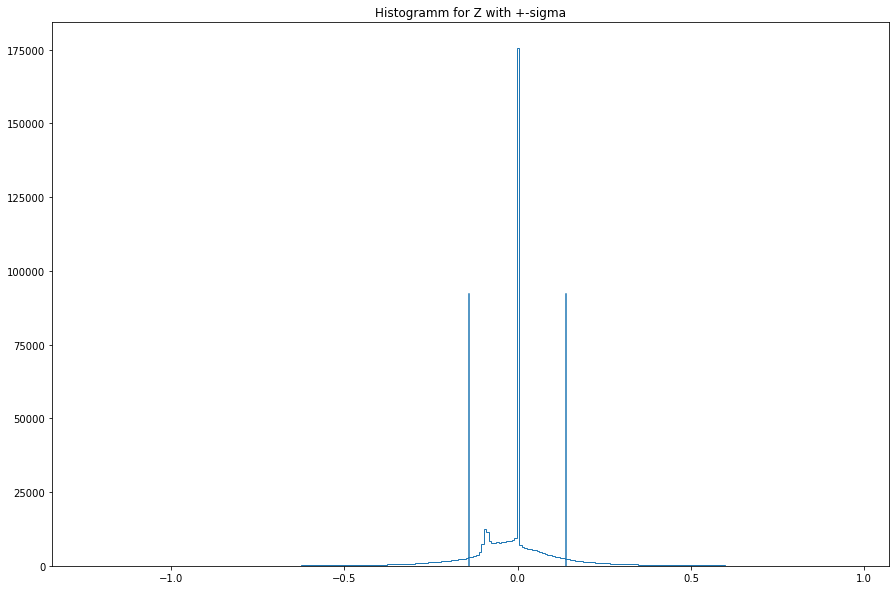

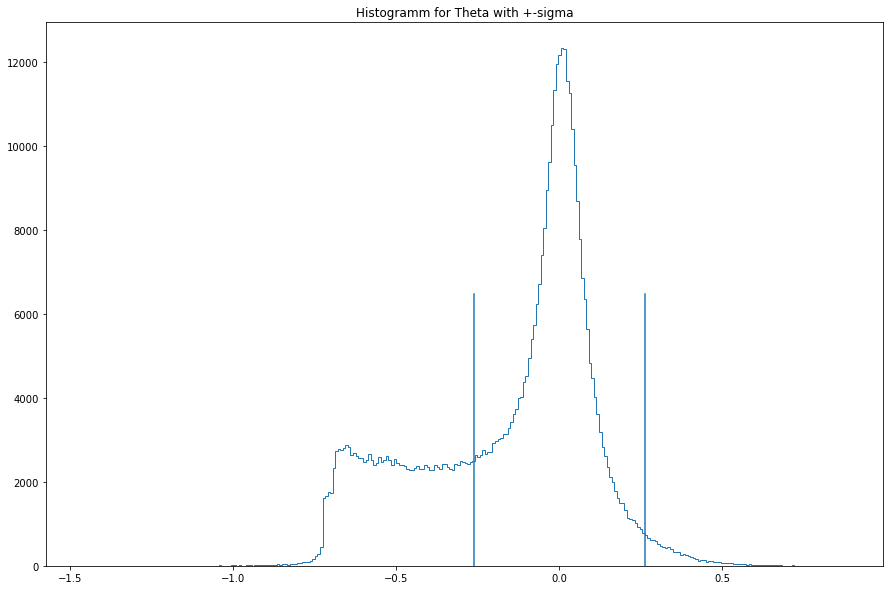

In [21]:
Y_predicted_2 = model2.predict(data_expert0_X_test)
plot_as_hist(Y_predicted_2[:,0],Y_predicted_2[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])
#plt.show

# Pruning

In [22]:
from tensorflow_model_optimization.sparsity.keras import ConstantSparsity
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning

pruning_params = {
    'pruning_schedule': ConstantSparsity(0.3, 0),
    'block_size': (1, 1),
    'block_pooling_type': 'AVG'
}

In [23]:
def create_model_p(): 

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(200, input_dim=27,activation='relu'))
    model.add(tf.keras.layers.Dense(200,activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    
    return model

In [24]:
model2=create_model_p()
model_to_prune = tfmot.sparsity.keras.prune_low_magnitude(
    model2, **pruning_params)
model_to_prune.summary()
model_to_prune.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
hist_model_to_prune=model_to_prune.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=[callbacks,scheduler],batch_size=64)

C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_7  (None, 200)              11002     
 8 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_7  (None, 200)              80202     
 9 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 2)                804       
 0 (PruneLowMagnitude)                                           
                                                                 
Total params: 92,008
Trainable params: 46,202
Non-trainable params: 45,806
_________________________________________________________________
Epoch 1/30
24228/24228 [==============================] - 135s 5ms/step - loss: 0.0579 - mae: 0.1518 - mse: 0.

mse_Z
0.01812440982527823
mse_Theta
0.09058541154013715
sigma_Z
0.1339059380216357
sigma_Theta
0.25741024205418395


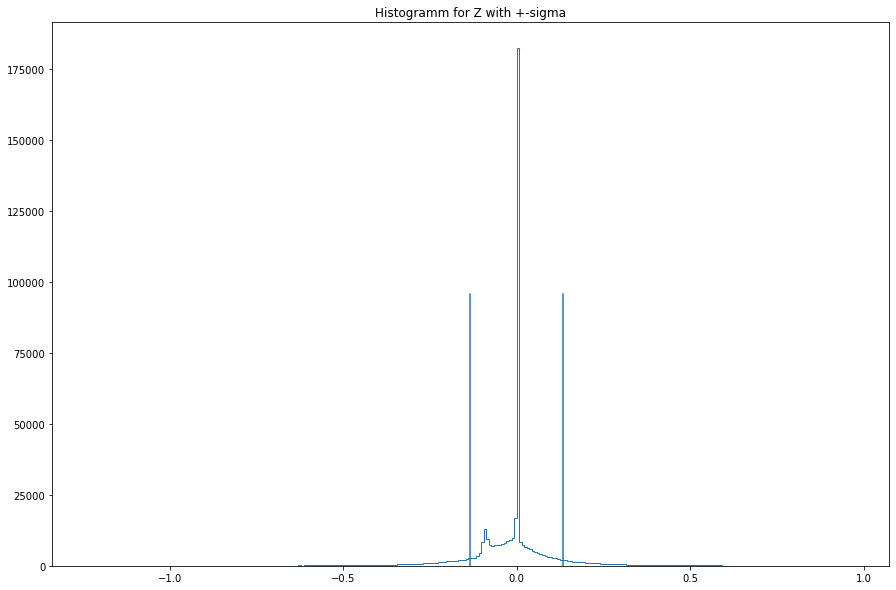

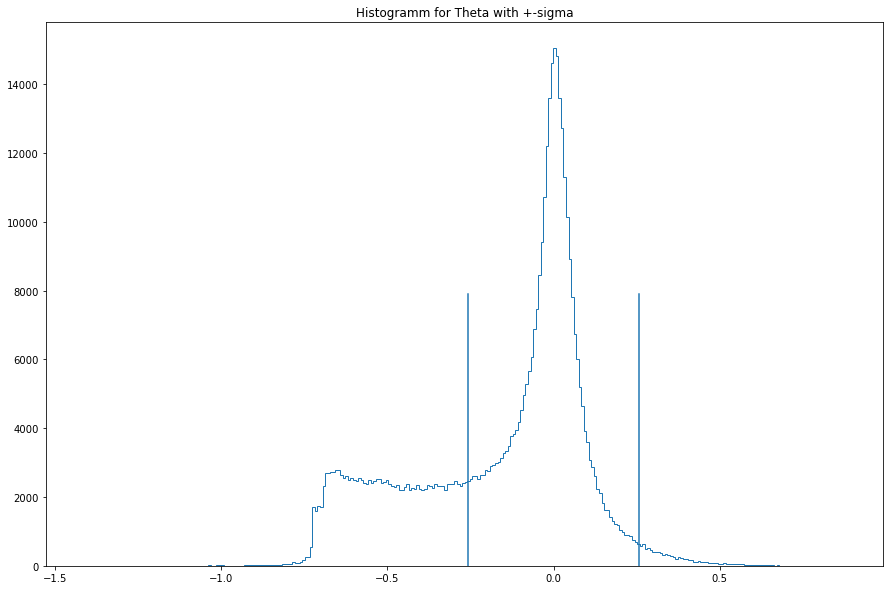

In [25]:
Y_predicted_p1 = model_to_prune.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p1[:,0],Y_predicted_p1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [26]:
mod2_first_layer_weights = model_to_prune.layers[0].get_weights()[0]
mod2_first_layer_biases = model_to_prune.layers[0].get_weights()[1]
mod2_second_layer_weights = model_to_prune.layers[1].get_weights()[0]
mod2_second_layer_biases = model_to_prune.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)#
#print((mod2_first_layer_weights[1]))

n_zerosmod2_first_layer_weights = np.count_nonzero(mod2_first_layer_weights==0)
print(n_zerosmod2_first_layer_weights)
layer_1_factor=n_zerosmod2_first_layer_weights/(model_to_prune.layers[0].count_params())
print(layer_1_factor)

n_zerosmod2_second_layer_weights = np.count_nonzero(mod2_second_layer_weights==0)
print(n_zerosmod2_second_layer_weights)
layer_2_factor=n_zerosmod2_second_layer_weights/(model_to_prune.layers[1].count_params())
print(layer_2_factor)

1620
0.14724595528085802
12000
0.14962220393506395


ca 14 prozent der weights sind 0 -> wir reduzieren die anzahl an neuronen um den Faktor 

In [27]:
def create_model_p2(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)), input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)), activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model 

In [28]:
model3=create_model_p2()
model_to_prune2 = tfmot.sparsity.keras.prune_low_magnitude(
    model3, **pruning_params)

C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


In [29]:
model_to_prune2.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_8  (None, 170)              9352      
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 170)              57972     
 2 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 2)                684       
 3 (PruneLowMagnitude)                                           
                                                                 
Total params: 68,008
Trainable params: 34,172
Non-trainable params: 33,836
_________________________________________________________________


In [30]:
model_to_prune2.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune2.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Epoch 1/30
48455/48455 [==============================] - 261s 5ms/step - loss: 0.0577 - mae: 0.1515 - mse: 0.0577 - val_loss: 0.0563 - val_mae: 0.1480 - val_mse: 0.0563
Epoch 2/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0561 - mae: 0.1470 - mse: 0.0561 - val_loss: 0.0557 - val_mae: 0.1468 - val_mse: 0.0557
Epoch 3/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0558 - mae: 0.1460 - mse: 0.0558 - val_loss: 0.0555 - val_mae: 0.1455 - val_mse: 0.0555
Epoch 4/30
48455/48455 [==============================] - 259s 5ms/step - loss: 0.0556 - mae: 0.1454 - mse: 0.0556 - val_loss: 0.0556 - val_mae: 0.1458 - val_mse: 0.0556
Epoch 5/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0554 - mae: 0.1450 - mse: 0.0554 - val_loss: 0.0554 - val_mae: 0.1452 - val_mse: 0.0554
Epoch 6/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0554 - mae: 0.1447 - mse: 0.0554 - val_loss: 0.0553 - val_mae: 0.144

mse_Z
0.018621246821039827
mse_Theta
0.09097139070504726
sigma_Z
0.13619243683097942
sigma_Theta
0.2575887964140582


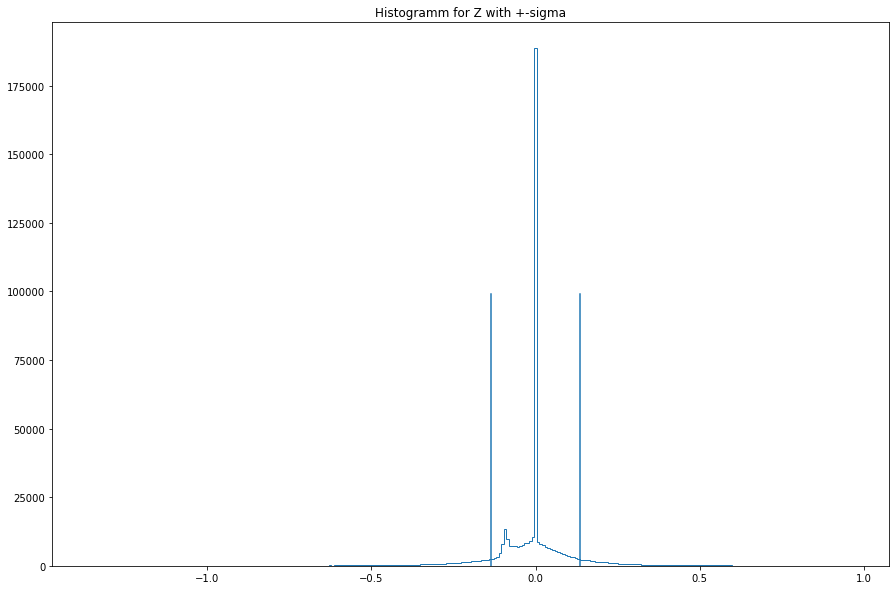

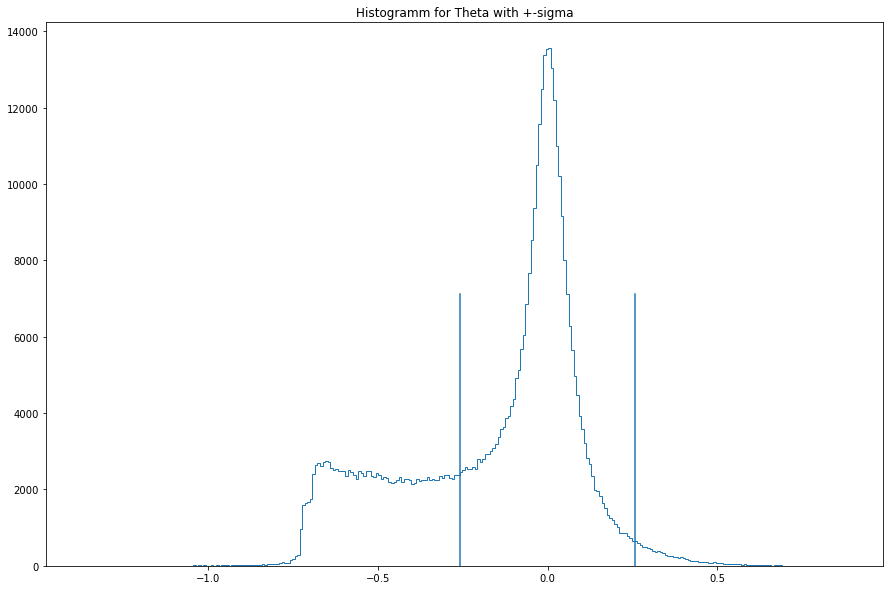

In [31]:
Y_predicted_p2 = model_to_prune2.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p2[:,0],Y_predicted_p2[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [32]:
mod3_first_layer_weights = model_to_prune2.layers[0].get_weights()[0]
mod3_first_layer_biases = model_to_prune2.layers[0].get_weights()[1]
mod3_second_layer_weights = model_to_prune2.layers[1].get_weights()[0]
mod3_second_layer_biases = model_to_prune2.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)

n_zerosmod3_first_layer_weights = np.count_nonzero(mod3_first_layer_weights==0)
print(n_zerosmod3_first_layer_weights)
layer_1_factor2=n_zerosmod3_first_layer_weights/(model_to_prune2.layers[0].count_params())
print(layer_1_factor2)

n_zerosmod3_second_layer_weights = np.count_nonzero(mod3_second_layer_weights==0)
print(n_zerosmod3_second_layer_weights)
layer_2_factor2=n_zerosmod3_second_layer_weights/(model_to_prune2.layers[1].count_params())
print(layer_2_factor2)

1377
0.14724123182207013
8670
0.14955495756572137


In [33]:
def create_model_p3(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)*(1-layer_1_factor2)), input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)*(1-layer_2_factor2)), activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model 

In [34]:
model4=create_model_p3()
model_to_prune3 = tfmot.sparsity.keras.prune_low_magnitude(
    model4, **pruning_params)
model_to_prune3.summary()
model_to_prune3.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune3.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_8  (None, 145)              7977      
 4 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 144)              41906     
 5 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 2)                580       
 6 (PruneLowMagnitude)                                           
                                                                 
Total params: 50,463
Trainable params: 25,374
Non-trainable params: 25,089
_________________________________________________________________


C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Epoch 1/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0579 - mae: 0.1521 - mse: 0.0579 - val_loss: 0.0564 - val_mae: 0.1485 - val_mse: 0.0564
Epoch 2/30
48455/48455 [==============================] - 259s 5ms/step - loss: 0.0562 - mae: 0.1473 - mse: 0.0562 - val_loss: 0.0561 - val_mae: 0.1475 - val_mse: 0.0561
Epoch 3/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0559 - mae: 0.1462 - mse: 0.0559 - val_loss: 0.0557 - val_mae: 0.1462 - val_mse: 0.0557
Epoch 4/30
48455/48455 [==============================] - 264s 5ms/step - loss: 0.0557 - mae: 0.1456 - mse: 0.0557 - val_loss: 0.0557 - val_mae: 0.1458 - val_mse: 0.0557
Epoch 5/30
48455/48455 [==============================] - 259s 5ms/step - loss: 0.0556 - mae: 0.1452 - mse: 0.0556 - val_loss: 0.0555 - val_mae: 0.1460 - val_mse: 0.0555
Epoch 6/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0555 - mae: 0.1449 - mse: 0.0555 - val_loss: 0.0554 - val_mae: 0.145

mse_Z
0.018774056140730914
mse_Theta
0.0909693731519332
sigma_Z
0.13684682754659233
sigma_Theta
0.26016429381090106


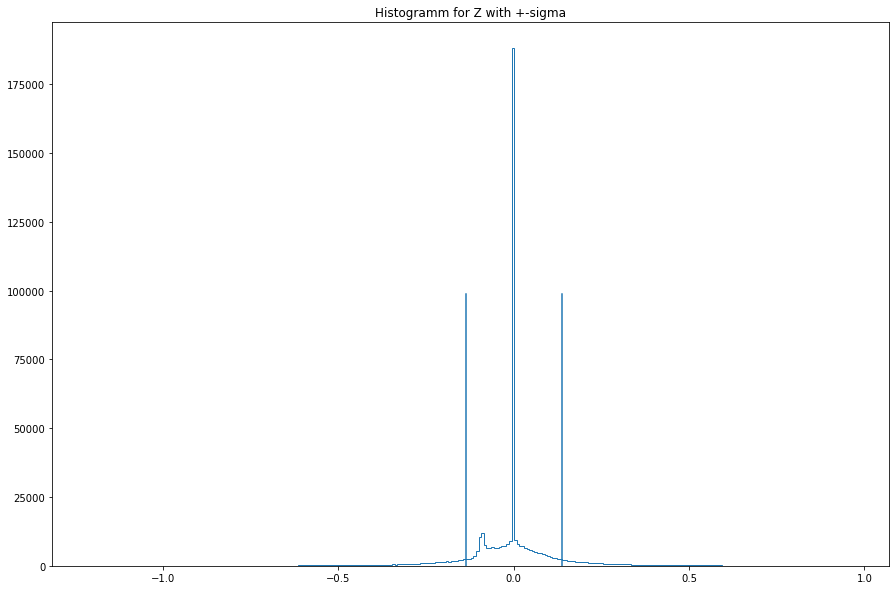

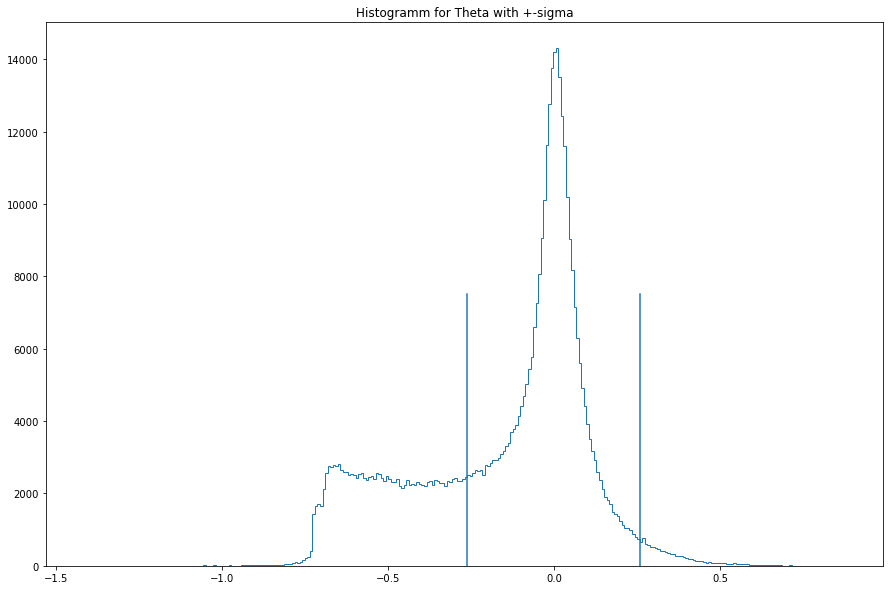

In [35]:
Y_predicted_p3 = model_to_prune3.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p3[:,0],Y_predicted_p3[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [36]:
mod4_first_layer_weights = model_to_prune3.layers[0].get_weights()[0]
mod4_first_layer_biases = model_to_prune3.layers[0].get_weights()[1]
mod4_second_layer_weights = model_to_prune3.layers[1].get_weights()[0]
mod4_second_layer_biases = model_to_prune3.layers[1].get_weights()[1]



n_zerosmod4_first_layer_weights = np.count_nonzero(mod4_first_layer_weights==0)
print(n_zerosmod4_first_layer_weights)
layer_1_factor3=n_zerosmod4_first_layer_weights/(model_to_prune3.layers[0].count_params())
print(layer_1_factor3)

n_zerosmod4_second_layer_weights = np.count_nonzero(mod4_second_layer_weights==0)
print(n_zerosmod4_second_layer_weights)
layer_2_factor3=n_zerosmod4_second_layer_weights/(model_to_prune3.layers[1].count_params())
print(layer_2_factor3)

1175
0.1472984831390247
6264
0.1494774018040376


In [37]:
def create_model_p4(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)*(1-layer_1_factor2)*(1-layer_1_factor3)), input_dim=27, activation='relu'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)*(1-layer_2_factor2)*(1-layer_1_factor3)), activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    return model 

In [38]:
model5=create_model_p4()
model_to_prune4 = tfmot.sparsity.keras.prune_low_magnitude(
    model5, **pruning_params)
model_to_prune4.summary()
model_to_prune4.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune4.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_8  (None, 124)              6822      
 7 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 123)              30629     
 8 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_8  (None, 2)                496       
 9 (PruneLowMagnitude)                                           
                                                                 
Total params: 37,947
Trainable params: 19,095
Non-trainable params: 18,852
_________________________________________________________________


C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Epoch 1/30
48455/48455 [==============================] - 261s 5ms/step - loss: 0.0771 - mae: 0.1975 - mse: 0.0771 - val_loss: 0.0763 - val_mae: 0.1951 - val_mse: 0.0763
Epoch 2/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0761 - mae: 0.1947 - mse: 0.0761 - val_loss: 0.0759 - val_mae: 0.1952 - val_mse: 0.0759
Epoch 3/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0758 - mae: 0.1940 - mse: 0.0758 - val_loss: 0.0757 - val_mae: 0.1943 - val_mse: 0.0757
Epoch 4/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0757 - mae: 0.1936 - mse: 0.0757 - val_loss: 0.0755 - val_mae: 0.1934 - val_mse: 0.0755
Epoch 5/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0756 - mae: 0.1933 - mse: 0.0756 - val_loss: 0.0756 - val_mae: 0.1932 - val_mse: 0.0756
Epoch 6/30
48455/48455 [==============================] - 260s 5ms/step - loss: 0.0756 - mae: 0.1932 - mse: 0.0756 - val_loss: 0.0754 - val_mae: 0.193

mse_Z
0.018773901621572053
mse_Theta
0.13162902937911386
sigma_Z
0.13659769980219302
sigma_Theta
0.36179576025743254


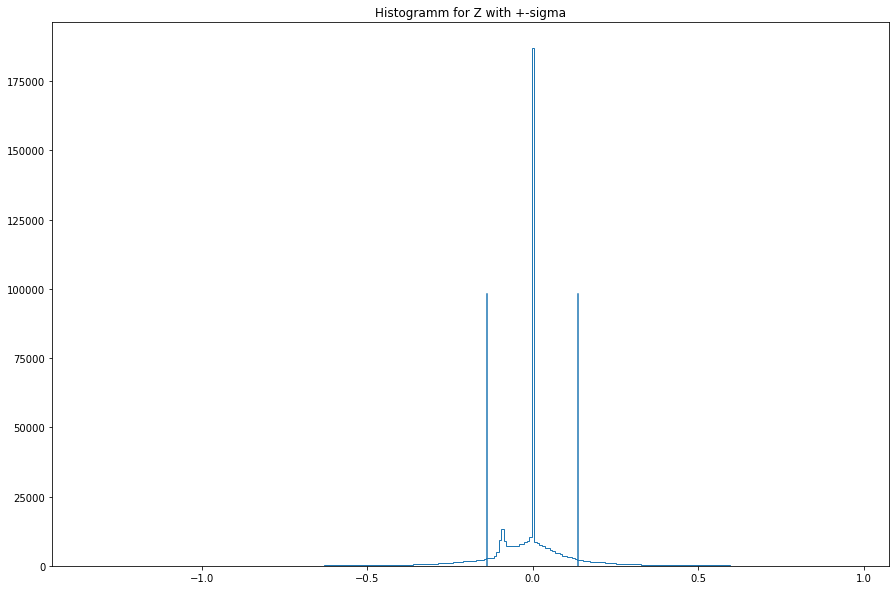

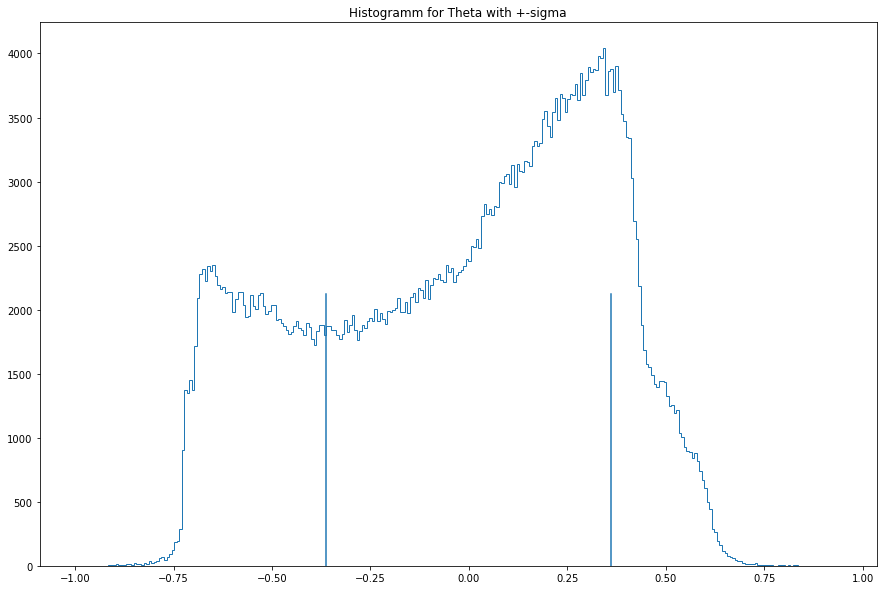

In [39]:
Y_predicted_p4 = model_to_prune4.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p4[:,0],Y_predicted_p4[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

Text(0.5, 1.0, 'mse Verlauf Z ')

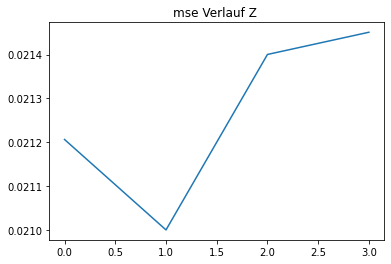

In [48]:
#mse plot for the pruning funktions 
mse=[0.02120627185940376,0.021,0.021400247660427432,0.021450934810811787]
x=[0,1,2,3]
plt.plot(x,mse)
plt.title('mse Verlauf Z ')

Text(0.5, 1.0, 'mse Verlauf Theta ')

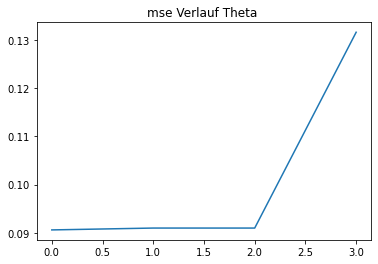

In [49]:
mse=[0.09058541154013715,0.09097139070504726,0.0909693731519332,0.13162902937911386]
x=[0,1,2,3]
plt.plot(x,mse)
plt.title('mse Verlauf Theta ')

# Funktionales Model

In [41]:
def create_model_f1(): 

    inputs = keras.Input(shape=(27,), name="digits")
    x1 = keras.layers.Dense(81, activation="relu")(inputs)
    outputs = keras.layers.Dense(2, name="predictions")(x1)
    
    return keras.Model(inputs=inputs, outputs=outputs) 

In [42]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_f1=create_model_f1()
model_f1.summary()
model_f1.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])
hist_model_f1=model_f1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=50,validation_split=0.2,callbacks=early_stop,batch_size=64)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 27)]              0         
                                                                 
 dense_90 (Dense)            (None, 81)                2268      
                                                                 
 predictions (Dense)         (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
24228/24228 [==============================] - 73s 3ms/step - loss: 0.0249 - mae: 0.1024 - mse: 0.0249 - val_loss: 0.0220 - val_mae: 0.0944 - val_mse: 0.0220
Epoch 2/50
24228/24228 [==============================] - 73s 3ms/step - loss: 0.0214 - mae: 0.0923 - mse: 0.0214 - val_loss: 0.0211 - val_mae: 0.0912 - v

24228/24228 [==============================] - 72s 3ms/step - loss: 0.0200 - mae: 0.0878 - mse: 0.0200 - val_loss: 0.0201 - val_mae: 0.0885 - val_mse: 0.0201


mse_Z
0.019691029420695158
mse_Theta
0.020746574775347214
sigma_Z
0.13906070549189023
sigma_Theta
0.14368591915788304


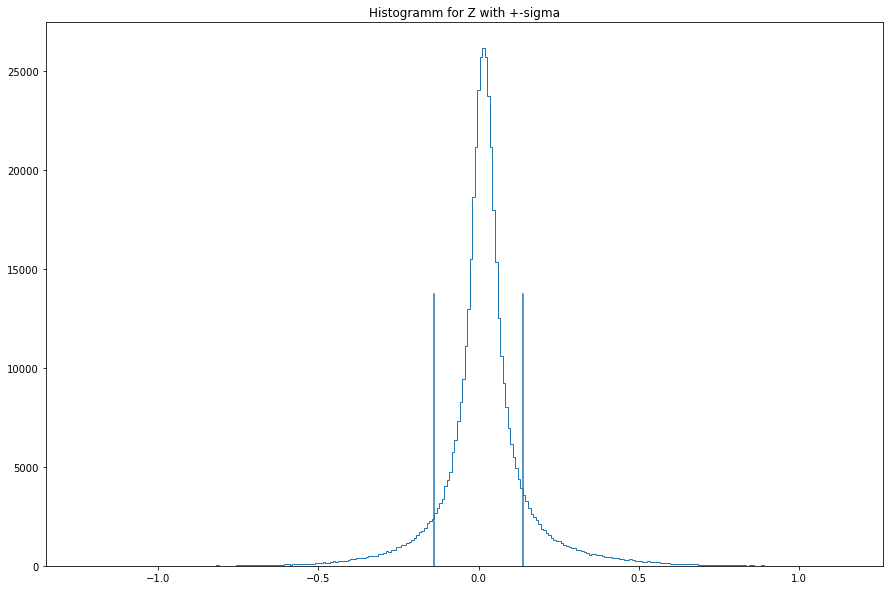

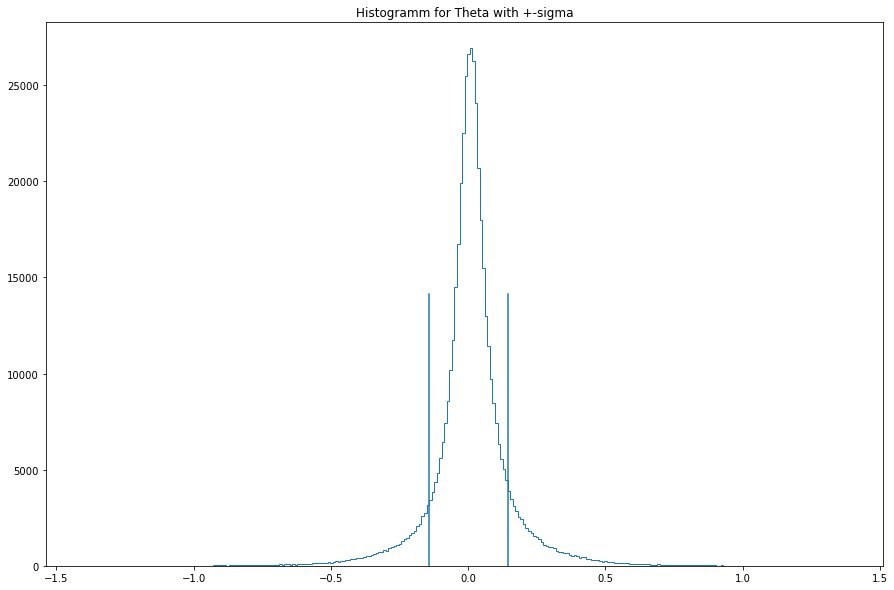

In [43]:
Y_predicted_f1 = model_f1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_f1[:,0],Y_predicted_f1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [44]:
model_to_prune_f1 = tfmot.sparsity.keras.prune_low_magnitude(
    model_f1, **pruning_params)
model_to_prune_f1.summary()
model_to_prune_f1.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mae', 'mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune_f1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
C:\Users\uqetv\AppData\Roaming\Python\Python37\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 27)]              0         
                                                                 
 prune_low_magnitude_dense_9  (None, 81)               4457      
 0 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_predict  (None, 2)                328       
 ions (PruneLowMagnitude)                                        
                                                                 
Total params: 4,785
Trainable params: 2,432
Non-trainable params: 2,353
_________________________________________________________________
Epoch 1/30
48455/48455 [==============================] - 218s 4ms/step - loss: 0.0204 - mae: 0.0893 - mse: 0.0204 - val_loss: 0.0202 - val_mae: 0.0886 - val_mse: 0.0202
Epoch 2/30
48455/

mse_Z
0.019629036972677993
mse_Theta
0.020885444449910664
sigma_Z
0.13991812810970183
sigma_Theta
0.1444322350222634


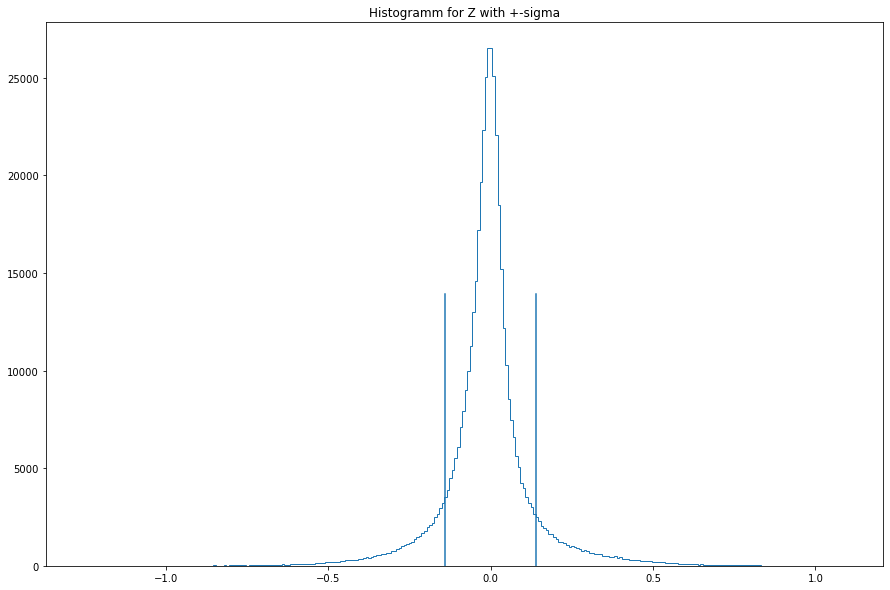

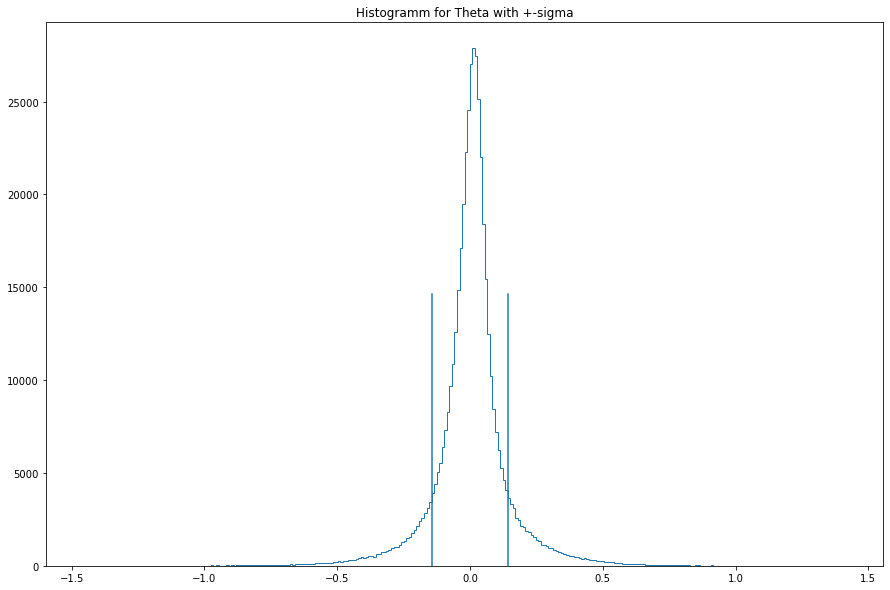

In [45]:
Y_predicted_pf1 = model_to_prune_f1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_pf1[:,0],Y_predicted_pf1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [46]:
# mod5_first_layer_weights = model_to_prune_f1.layers[0].get_weights()[0]
# #mod5_first_layer_biases = model_to_prune_f1.layers[0].get_weights()[1]
# #mod5_second_layer_weights = model_to_prune_f1.layers[1].get_weights()[0]
# #mod5_second_layer_biases = model_to_prune_f1.layers[1].get_weights()[1]



# # n_zerosmod5_first_layer_weights = np.count_nonzero(mod5_first_layer_weights==0)
# # print(n_zerosmod5_first_layer_weights)
# # layer_1_factor4=n_zerosmod5_first_layer_weights/(model_to_prune4.layers[0].count_params())
# # print(layer_1_factor4)

# # n_zerosmod5_second_layer_weights = np.count_nonzero(mod5_second_layer_weights==0)
# # print(n_zerosmod5_second_layer_weights)
# # layer_2_factor4=n_zerosmod5_second_layer_weights/(model_to_prune4.layers[1].count_params())
# # print(layer_2_factor4)